# Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi
from scipy import integrate
from IPython.display import Markdown

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["text.usetex"] = True
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}"
})

Answer = lambda ans: Markdown("""
<div style='color: blue!important'>%s</div>
"""%ans)

## Problem 1

Recall that in Section 2.6 of Week 9 we developed a matrix representation of Schrodinger's equation, and solving Schrodinger's equation then became finding the eigenvalues and eigenvectors of the Hamiltonian matrix. Let us redo the problem but this time with the potential:

$$
V(x) = \left\{ \begin{array}{cl}
               +\infty & x \le 0 \\
               0 & 0 \lt x \lt L/2 \\
               +V_0 & L/2 \le x \lt L \\
               +\infty & x \ge L
               \end{array}\right.
$$

In this case the Hamiltonian matrix is given by

$$
H_{mn}
= \left\{ \begin{array}{cl}
          \frac{\hbar^2 \pi^2 n^2}{2ML^2} + \frac{V_0}{2} & \text{if $m = n$} \\
          \frac{V_0}{\pi} \left[ \frac{\sin\left(\frac{\pi}{2}(m+n)\right)}{m+n} 
                               - \frac{\sin\left(\frac{\pi}{2}(m-n)\right)}{m-n} \right] & 
          \text{if $m \ne n$ and one is even, one is odd} \\
          0 & \text{otherwise} \\
          \end{array} \right.
$$

We can simplify things a little bit by dividing both sides of the matrix equation $\mathbf{H} \Psi = E \Psi$ by $\hbar^2/2ML^2$, namely,

$$
\frac{\mathbf{H}}{\left(\frac{\hbar^2}{2ML^2}\right)} \Psi = \frac{E}{\left(\frac{\hbar^2}{2ML^2}\right)} \Psi
$$

and let $\gamma \equiv V_0/(\hbar^2/2ML^2)$.

--- 
 
<div style="color:blue">

$$
\begin{aligned}
\frac{H_{mn}}{\displaystyle \left(\frac{\hbar^2}{2ML^2}\right)}
&= \frac{1}{\displaystyle \left(\frac{\hbar^2}{2ML^2}\right)}
\left\{ \begin{array}{cl}\displaystyle
\frac{\hbar^2 \pi^2 n^2}{2ML^2} + \frac{V_0}{2} & \text{if $m = n$} 
\\[2ex] \displaystyle
\frac{V_0}{\pi} \left[ \frac{\sin\left(\frac{\pi}{2}(m+n)\right)}{m+n} - \frac{\sin\left(\frac{\pi}{2}(m-n)\right)}{m-n} \right] & \text{if $m \ne n$ and one is even, one is odd}
\\[2ex] \displaystyle
0 & \text{otherwise} \\
\end{array} \right.
\\[2ex]
&=
\left\{ \begin{array}{cl}\displaystyle
\pi^2n^2 + \frac{\gamma}{2} & \text{if $m = n$} 
\\[2ex] \displaystyle
\frac{\gamma}{\pi} \left[ \frac{\sin\left(\frac{\pi}{2}(m+n)\right)}{m+n} - \frac{\sin\left(\frac{\pi}{2}(m-n)\right)}{m-n} \right] & \text{if $m \ne n$ and $m+n\in$ odd}
\\[2ex] \displaystyle
0 & \text{otherwise} \\
\end{array} \right.
\end{aligned}
$$

</div>

### Problem 1.1 (2 points)

Write a function which takes $N$ ("dimension", or number of terms used in the expansion) and returns the Hamiltonian matrix.

In [2]:
# Write your code here

def Hamiltonian(N,gamma=1):
    H = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            m = i+1
            n = j+1
            if m == n:
                H[i,j] = pi**2 * n**2 + 0.5*gamma
            else:
                if (m+n)%2==1:
                    H[i,j] = gamma/pi * (sin(pi/2*(m+n))/(m+n) - sin(pi/2*(m-n))/(m-n))
                else:
                    H[i,j] = 0
    return H

### Problem 1.2 (1 point)

Let $\gamma = 2$ and $N = 10$. Find the ground state energy of the particle. Your answer should be close to what you got in Problem 1 of Homework 3.

In [3]:
# Write your code here
eigvals, eigvecs = np.linalg.eigh(Hamiltonian(N=20,gamma=2))
E0 = eigvals[0]

Answer(r"""$$E_{0}\approx -\frac{\hbar^2}{2mL^2}\times%.16f$$
"""%E0)


<div style='color: blue!important'>$$E_{0}\approx -\frac{\hbar^2}{2mL^2}\times10.8442958717146993$$
</div>


### Problem 1.3 (2 points)

Plot the ground state wavefunction. Again, it should be close to what you had in Problem 1 of Homework 3.

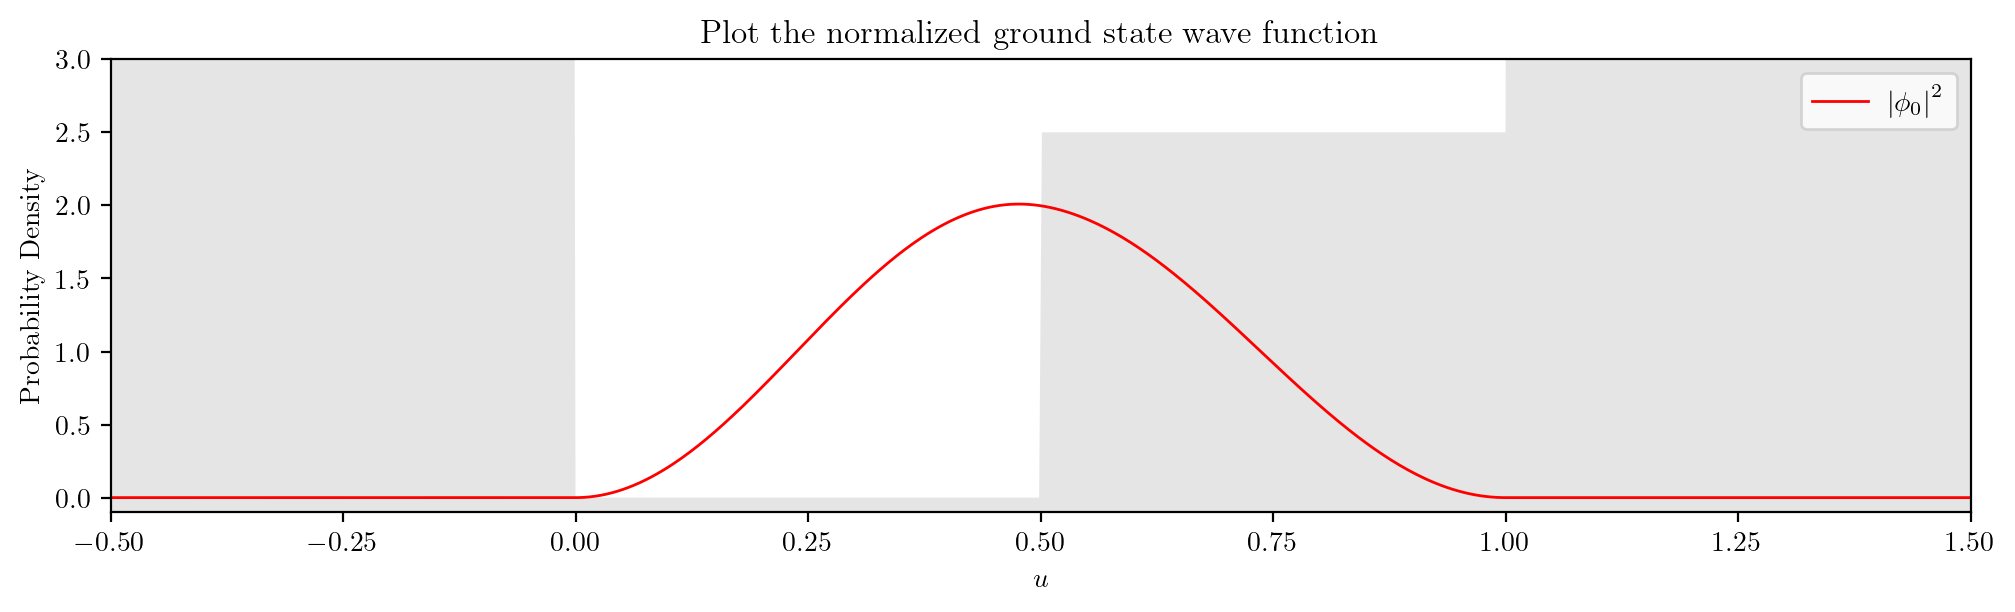

In [4]:
# Write your code here
def phi2(u, i=0):
    u = np.array(u)
    coefs = eigvecs[:,i]
    
    def psi(x):
        f = 0
        for n in range(len(coefs)):
            f += coefs[n] * np.sin(np.pi*(n+1)*x) # Use n+1, not n
        f[x<0] = 0
        f[x>1] = 0
        return f
    
    def psi2(u):
        return psi(u)**2
    
    A, _ = integrate.quadrature(psi2, 0, 1)
    psi_norm2 = psi2(u) / A
    
    return psi_norm2


def graph_potential(u):
    u *= np.array([1])
    V = u*0 + 2.5
    V[u<0.5] = 0
    V[u<0] = 10
    V[u>1] = 10
    return V

n = 1000
u = np.linspace(-1, 2, n)
P = phi2(u,0)
V = graph_potential(u)

plt.figure(dpi=200,figsize=(12,3))
plt.fill_between(u, -1, V, color='gray', alpha=0.2,linewidth=0)
plt.plot(u, P, color='red',linewidth=1,label=r'$\left|\phi_{0}\right|^2$')
plt.ylim(-0.1,3.0)
plt.xlim(-0.5,1.5)
plt.title(r"Plot the normalized ground state wave function")
plt.xlabel(r'$u$')
plt.ylabel(r'Probability Density')
plt.legend()
plt.show()

## Problem 2

In 1963 Edward Lorenz derived from a simplified model of weather patterns the following equations:

$$
\begin{eqnarray}
\frac{dx}{dt} &=& \sigma (y - x) \\
\frac{dy}{dt} &=& \gamma x - y - xz \\
\frac{dz}{dt} &=& xy - \beta z
\end{eqnarray}
$$

where $\sigma$, $\gamma$, and $\beta$ are constants. These equations are famous because they were one of the first incontrovertible examples of **deterministic chaos**, the occurrence of apparently random motion even though there is no randomness built into the equations.

**References**
- Computational Physics, M. Newman (2013)
- [Chaos theory](https://en.wikipedia.org/wiki/Chaos_theory), Wikipedia

--- 
 
<div style="color:blue">

Using the method of Runge Kutta 
    
</div>

In [5]:
def RK1(f,y_0,x,h):
    y = np.zeros([len(x),len(y_0)])
    y[0] = y_0
    for i in range(0,len(x)-1):
        y[i+1] = y[i] + h * f(x[i],y[i])
    return y

def RK2(f,y_0,x,h):
    b1, b2 = 1/2, 1/2
    c1, c2 = 0, 1
    a21 = 1
    y = np.zeros([len(x),len(y_0)])
    y[0] = y_0
    for i in range(0,len(x)-1):
        f1 = f(x[i] + c1*h, y[i])
        f2 = f(x[i] + c2*h, y[i] + h*a21*f1)
        y[i+1] = y[i] + h * (b1*f1 + b2*f2)
    return y

def RK3(f,y_0,x,h):
    b1, b2, b3 = 1/6, 2/3, 1/6
    c1, c2, c3 = 0, 1/2, 1
    a21 = 1/2
    a31, a32 = -1, 2
    y = np.zeros([len(x),len(y_0)])
    y[0] = y_0
    for i in range(0,len(x)-1):
        f1 = f(x[i] + c1*h, y[i])
        f2 = f(x[i] + c2*h, y[i] + h*a21*f1)
        f3 = f(x[i] + c3*h, y[i] + h*a31*f1 + h*a32*f2)
        y[i+1] = y[i] + h * (b1*f1 + b2*f2 + b3*f3)
    return y

def RK4(f,y_0,x,h):
    b1, b2, b3, b4 = 1/6, 1/3, 1/3, 1/6
    c1, c2, c3, c4 = 0, 1/2, 1/2, 1
    a21           = 1/2
    a31, a32      = 0, 1/2
    a41, a42, a43 = 0, 0, 1
    y = np.zeros([len(x),len(y_0)])
    y[0] = y_0
    for i in range(0,len(x)-1):
        f1 = f(x[i] + c1*h, y[i])
        f2 = f(x[i] + c2*h, y[i] + h*a21*f1)
        f3 = f(x[i] + c3*h, y[i] + h*a31*f1 + h*a32*f2)
        f4 = f(x[i] + c4*h, y[i] + h*a41*f1 + h*a42*f2 + h*a43*f3)
        y[i+1] = y[i] + h * (b1*f1 + b2*f2 + b3*f3 + b4*f4)
    return y

def RK5(f,y_0,x,h):
    b1 ,b2 ,b3 ,b4, b5  = 1/6, 0, 0, 2/3, 1/6
    c1, c2, c3, c4, c5  = 0, 1/3, 1/3, 1/2, 1
    a21                 = 1/3  
    a31, a32            = 1/6,  1/6
    a41, a42, a43       = 1/8,  0,   3/8
    a51, a52, a53, a54  = 1/2,  0,   -3/2, 2
    y = np.zeros([len(x),len(y_0)])
    y[0] = y_0
    for i in range(0,len(x)-1):
        f1 = f(x[i] + c1*h, y[i])
        f2 = f(x[i] + c2*h, y[i] + h*a21*f1)
        f3 = f(x[i] + c3*h, y[i] + h*a31*f1 + h*a32*f2)
        f4 = f(x[i] + c4*h, y[i] + h*a41*f1 + h*a42*f2 + h*a43*f3)
        f5 = f(x[i] + c5*h, y[i] + h*a51*f1 + h*a52*f2 + h*a53*f3 + h*a54*f4)
        y[i+1] = y[i] + h * (b1*f1 + b2*f2 + b3*f3 + b4*f4 + b5*f5)
    return y

def RK8(f, y_0, x, h):
    b1, b2, b3, b4, b5, b6, b7, b8 = 41/840, 0, 0, 9/35, 9/35, 9/280, 34/105, 9/280
    c1, c2, c3, c4, c5, c6, c7, c8 = 0, 2/27, 4/27, 2/9, 1/3, 4/9, 10/27, 1/3
    d1, d2, d3, d4, d5, d6, d7, d8 = 0, 0, 0, 0, 0, 0, 0, 1
    a21 = 2/27
    a31, a32 = 1/36, 1/12
    a41, a42, a43 = 1/24, 0, 1/8
    a51, a52, a53, a54 = 5/12, 0, -25/16, 25/16
    a61, a62, a63, a64, a65 = 1/20, 0, 0, 1/4, 1/5
    a71, a72, a73, a74, a75, a76 = -25/108, 0, 0, 125/108, -65/27, 125/54
    a81, a82, a83, a84, a85, a86, a87 = 31/300, 0, 0, 0, 61/225, -2/9, 13/900
    y = np.zeros([len(x), len(y_0)])
    y[0] = y_0
    for i in range(len(x)-1):
        k1 = f(x[i] + c1*h, y[i]) * h
        k2 = f(x[i] + c2*h, y[i] + k1*a21) * h
        k3 = f(x[i] + c3*h, y[i] + k1*a31 + k2*a32) * h
        k4 = f(x[i] + c4*h, y[i] + k1*a41 + k2*a42 + k3*a43) * h
        k5 = f(x[i] + c5*h, y[i] + k1*a51 + k2*a52 + k3*a53 + k4*a54) * h
        k6 = f(x[i] + c6*h, y[i] + k1*a61 + k2*a62 + k3*a63 + k4*a64 + k5*a65) * h
        k7 = f(x[i] + c7*h, y[i] + k1*a71 + k2*a72 + k3*a73 + k4*a74 + k5*a75 + k6*a76) * h
        k8 = f(x[i] + c8*h, y[i] + k1*a81 + k2*a82 + k3*a83 + k4*a84 + k5*a85 + k6*a86 + k7*a87) * h
        y[i+1] = y[i] + h * (k1*b1 + k2*b2 + k3*b3 + k4*b4 + k5*b5 + k6*b6 + k7*b7 + k8*b8)
    
    return y

### Problem 2.1 (3 points)

Solve the Lorenz equations for the case $\sigma = 10$, $\gamma = 28$, and $\beta = \frac{8}{3}$ in the range from $t = 0$ to $t = 50$ with initial conditions $(x, y, z) = (0, 1, 0)$. Plot $x$, $y$, $z$ as a function of time $t$. Note the unpredictable nature of the motion.

--- 
 
<div style="color:blue">

A pitchfork bifurcation occurs at $\gamma = 1$, and for $\gamma > 1$ two additional critical points appear at

$$
\left(\pm{\sqrt {\beta \left(\gamma -1\right)}},\pm{\sqrt {\beta \left(\gamma -1\right)}},\gamma -1\right)
$$
    
</div>

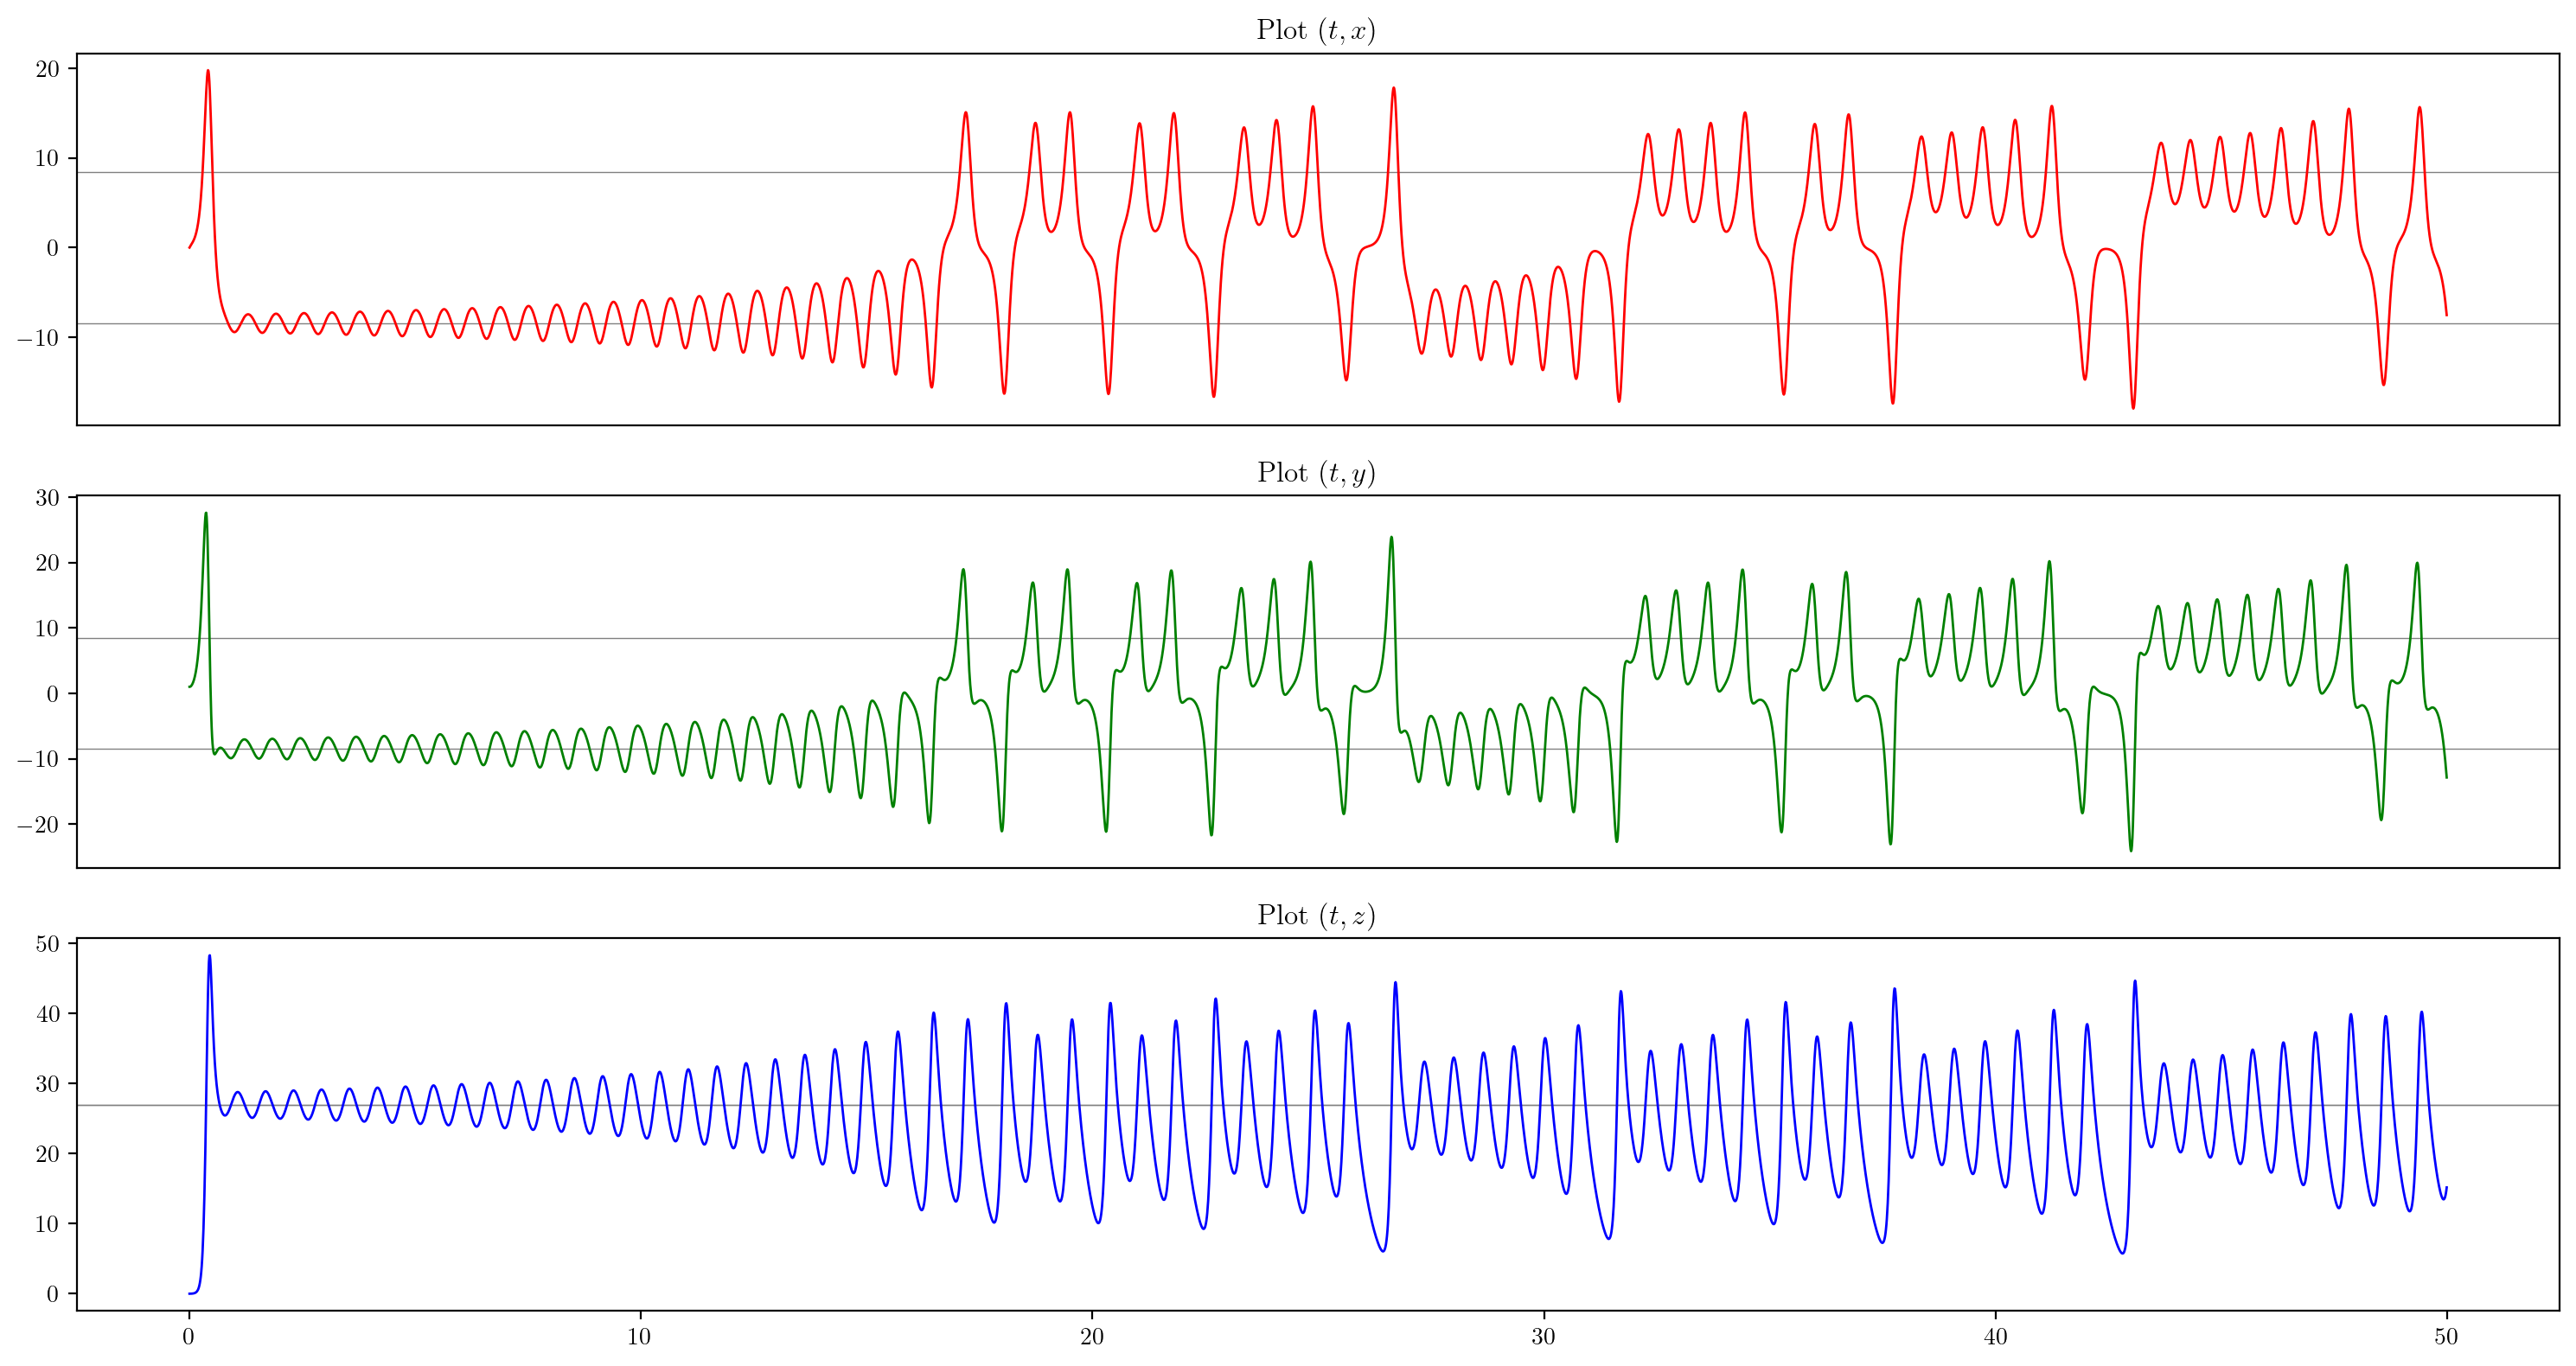

In [6]:
# Write your code here
sigma = 10
gamma = 28
beta = 8/3

Attracting_point = np.array([
    [np.sqrt(beta*(gamma-1)),np.sqrt(beta*(gamma-1)),gamma-1],
    [-np.sqrt(beta*(gamma-1)),-np.sqrt(beta*(gamma-1)),gamma-1]
])

dt = 0.01
t = np.arange(0,50,dt)
U0 = np.array([0,1,0]).T # u = (x,y,z)

def f(t,u):
    Fx = sigma * (u[1]-u[0])              # x' = sigma * (y - x)
    Fy = gamma * u[0] - u[1] - u[0]*u[2]  # y' = gamma * x - y - x * z 
    Fz = u[0]*u[1] - beta * u[2]          # z' = x * y - beta * z
    return np.array([Fx,Fy,Fz])

RK = RK5 # Runge Kutta Method 1,2,3,4,5
U = RK(f, U0, t, dt)

x = U[:,0]
y = U[:,1]
z = U[:,2]

fig = plt.figure(dpi=200,figsize=(15,8))

ax = fig.add_subplot(3,1,1)
ax.plot(t,x,color='red',linewidth=1,zorder=5)
ax.axhline(y=Attracting_point[0][0],color='gray',linewidth=0.5)
ax.axhline(y=Attracting_point[1][0],color='gray',linewidth=0.5)
ax.set_xticks([]) 
ax.set_title(r"Plot $\left(t,x\right)$")

ax = fig.add_subplot(3,1,2)
ax.plot(t,y,color='green',linewidth=1,zorder=5)
ax.axhline(y=Attracting_point[0][1],color='gray',linewidth=0.5)
ax.axhline(y=Attracting_point[1][1],color='gray',linewidth=0.5)
ax.set_xticks([])
ax.set_title(r"Plot $\left(t,y\right)$")

ax = fig.add_subplot(3,1,3)
ax.plot(t,z,color='blue',linewidth=1,zorder=5)
ax.axhline(y=Attracting_point[0][2],color='gray',linewidth=0.5)
ax.axhline(y=Attracting_point[1][2],color='gray',linewidth=0.5)
ax.set_title(r"Plot $\left(t,z\right)$")

fig.tight_layout()
plt.show()

### Problem 2.2 (1 point)

Make a plot of $z$ versus $x$. You should see a picture of the famous "strange attractor" of the Lorenz equations, a lopsided butterfly-shaped plot that never repeats itself.

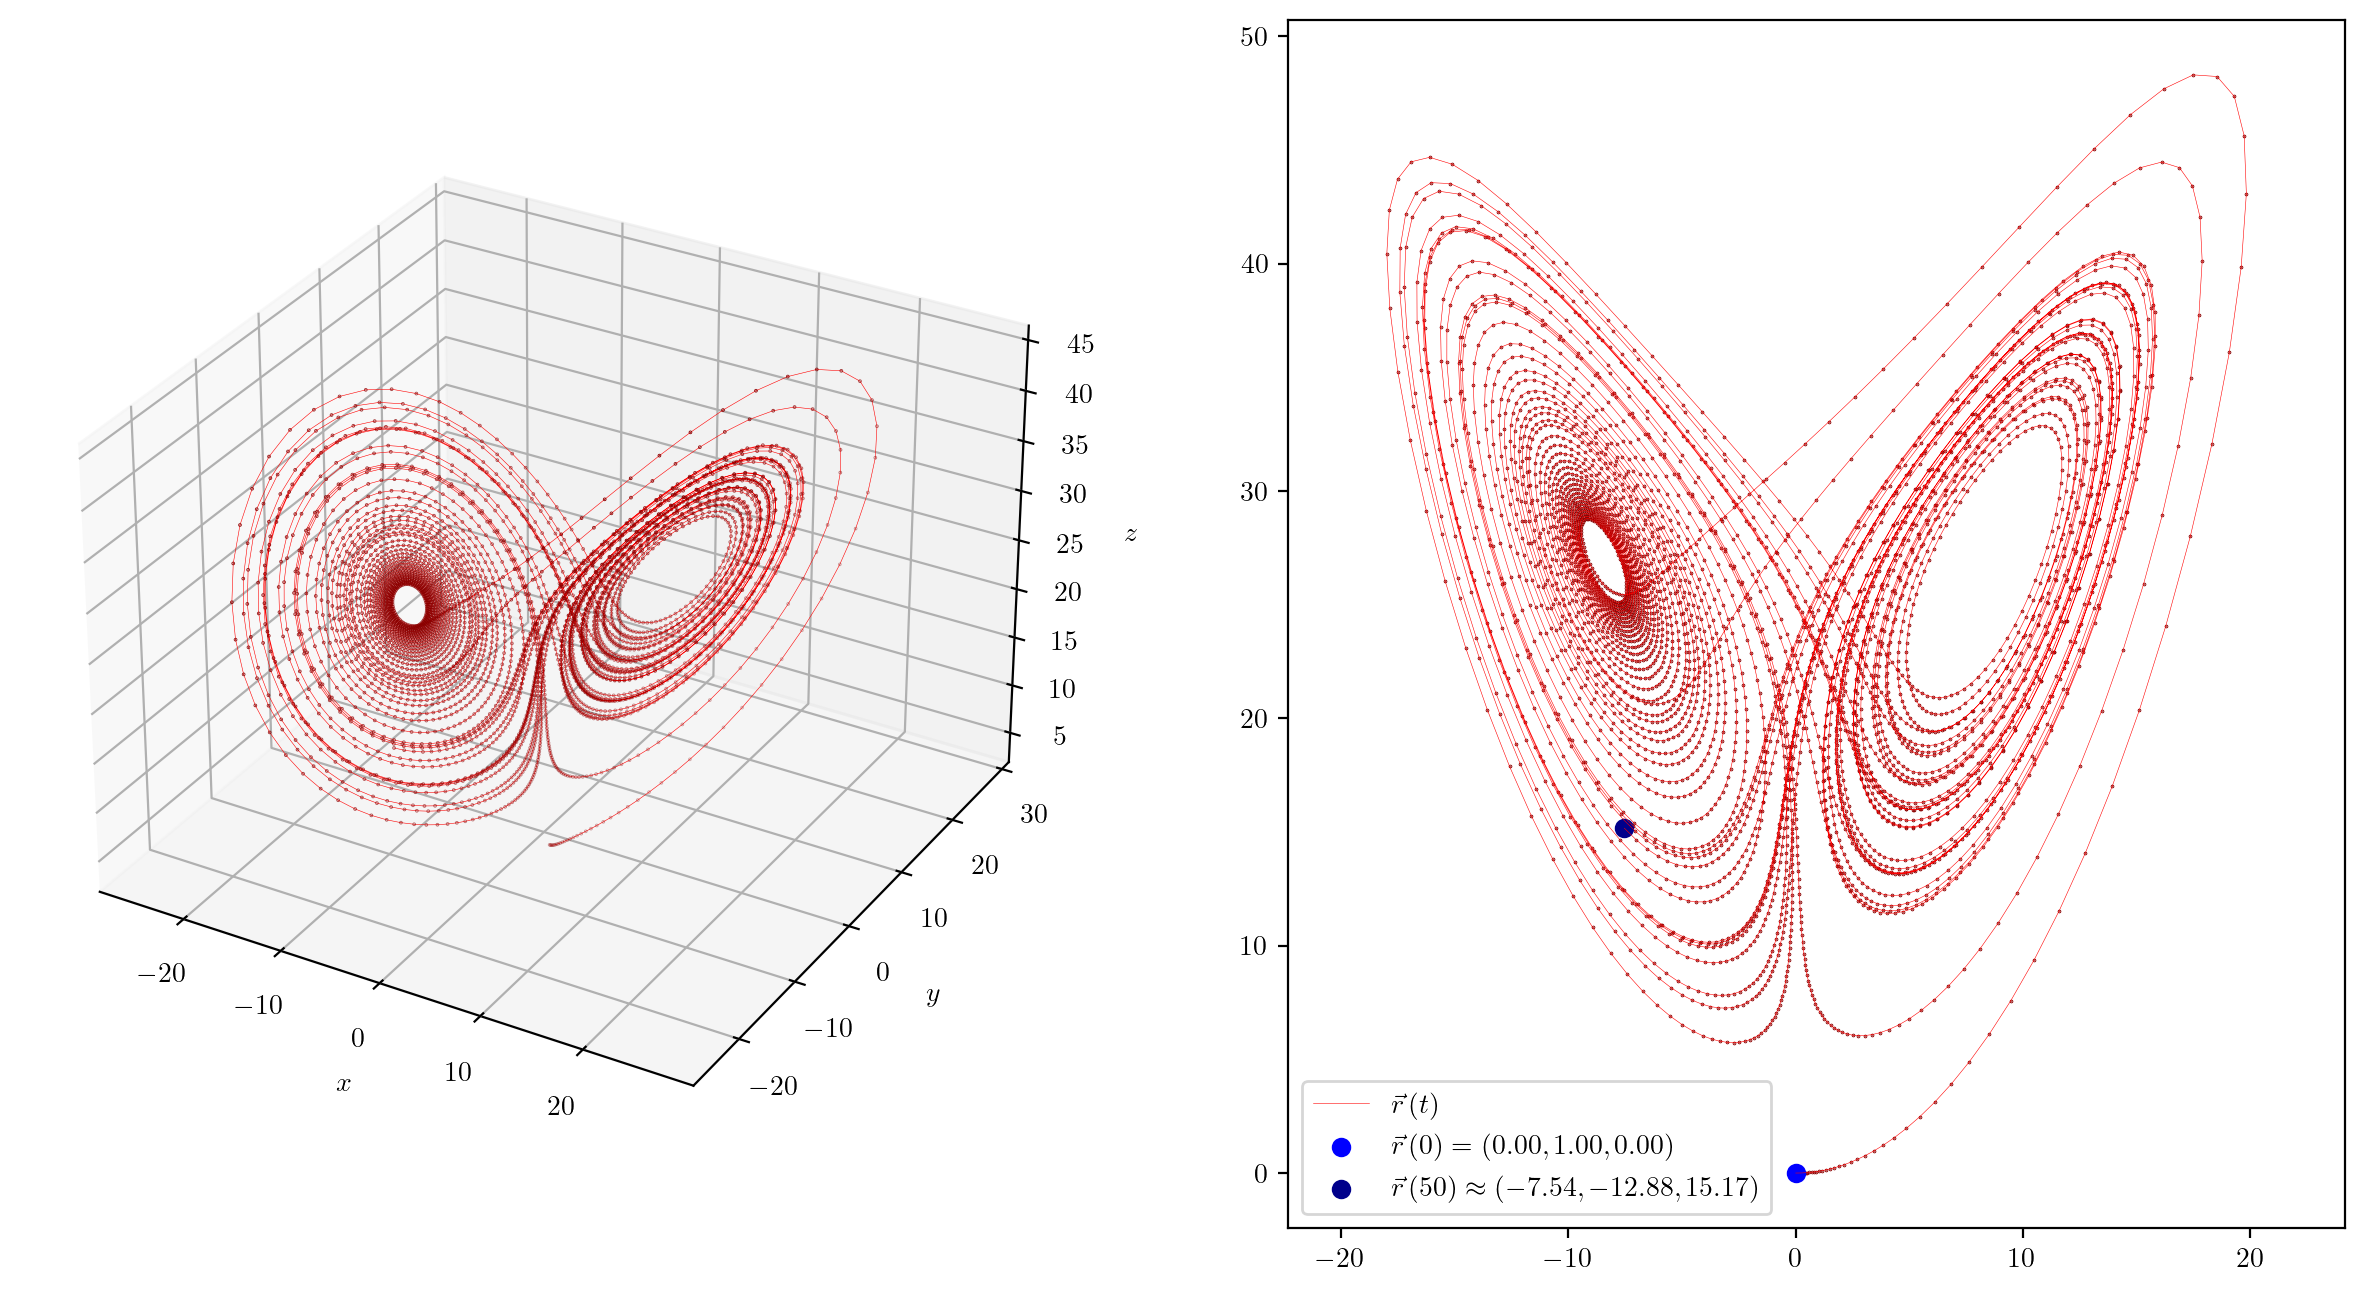

In [7]:
# Write your code here
fig = plt.figure(dpi=200,figsize=(15,8))

ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(x,y,z,linewidth=0.2,color='red')
ax.scatter(x,y,z,s=0.1,color='darkred')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.axis('equal')

ax = fig.add_subplot(1,2,2)
ax.plot(x,z,linewidth=0.2,color='red',label=r"$\vec{r}\left(t\right)$")
ax.scatter(x,z,s=0.1,color='darkred')
ax.scatter(x[0],z[0],color='blue',label=r'$\vec{r}\left(0\right) = (%.2f,%.2f,%.2f)$'%(x[0],y[0],z[0]))
ax.scatter(x[-1],z[-1],color='darkblue',label=r'$\vec{r}\left(50\right) \approx (%.2f,%.2f,%.2f)$'%(x[-1],y[-1],z[-1]))
ax.axis('equal')
ax.set_title("")
ax.legend()
plt.show()

### Problem 2.3 (2 points)

Make plots of $y$ versus time $t$ with slightly different initial conditions: $(x, y, z) = (0, 1, 0)$, $(0, 1.001, 0)$, $(0, 1.0001, 0)$, and $(0, 1.00001, 0)$. Note that the tiny differences in initial conditions lead to significant changes after some time.

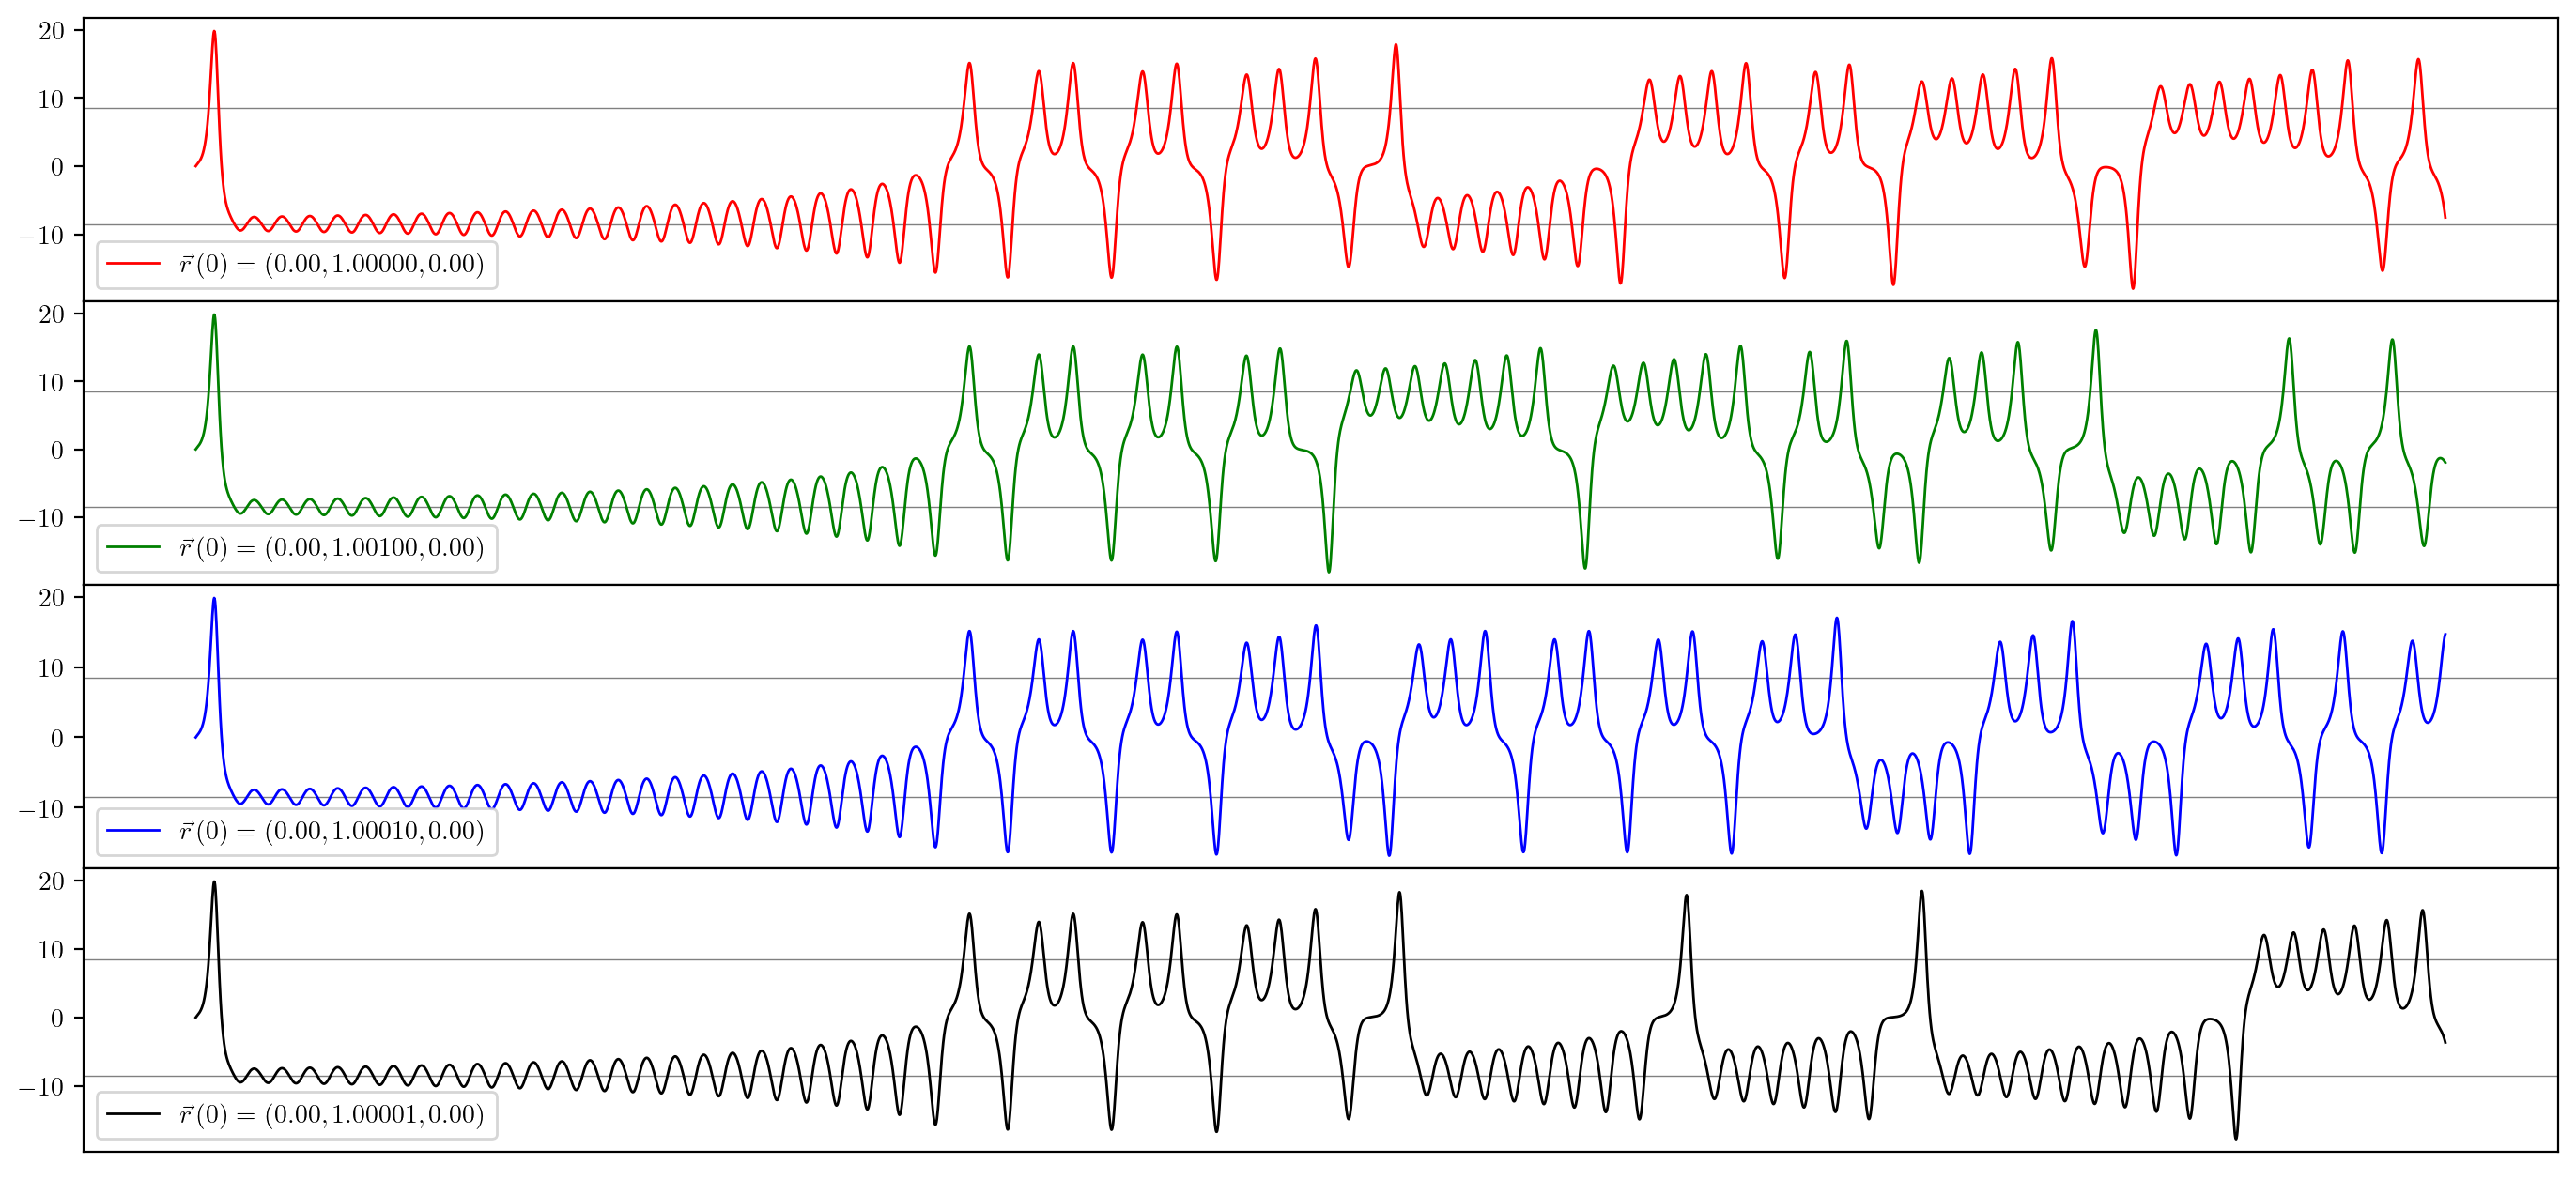

In [8]:
# Write your code here
dt = 0.01
t = np.arange(0,50,dt)
dys = [0.0, 1e-3, 1e-4, 1e-5]
colors = [
    'red',
    'green',
    'blue',
    'black',
]
RK = RK5 # Runge Kutta Method 1,2,3,4,5
fig = plt.figure(dpi=200,figsize=(17,8))
for i in range(len(dys)):
    U0 = np.array([0,1+dys[i],0]).T
    U = RK(f, U0, t, dt)
    x = U[:,0]
    y = U[:,1]
    z = U[:,2]

    ax = fig.add_subplot(len(dys),1,i+1)
    ax.plot(t,x,color=colors[i],linewidth=1,zorder=5,
            label=r'$\vec{r}\left(0\right) = (%.2f,%.5f,%.2f)$'%(x[0],y[0],z[0]))
    ax.axhline(y=Attracting_point[0][1],color='gray',linewidth=0.5)
    ax.axhline(y=Attracting_point[1][1],color='gray',linewidth=0.5)
    ax.set_xticks([]) 
    ax.legend()

fig.subplots_adjust(hspace=0.0)
plt.show()

## Problem 3

Recall the thrown ball problem in Section 6.1 of Week 11. 
--- 
 
<div style="color:blue">

$$
\frac{d^2y}{dt^2} = -g,\quad \Rightarrow y'' = -g
$$

define a new vector 

$$
\vec{U} = \begin{pmatrix} y \\ y' \end{pmatrix},
$$

then we have

$$ 
\frac{d}{dt}\vec{U} = \begin{pmatrix}y'\\y''\end{pmatrix} = \begin{pmatrix}y'\\-g\end{pmatrix}
$$
    
</div>

### Problem 3.1 (3 points)

Compute the trajectory of the ball with the boundary conditions: $y = 10$ at $t = 0$ and $y = 20$ at $t = 10$. What does the initial velocity have to be in order to satisfy those boundary conditions?

In [9]:
# Write your code here

def f(t,U):
    f0 = U[1] #
    f1 = -9.8 #
    return np.array([f0, f1])

def height(velocity0, t_end=10, dt=0.01, rk=RK5, array=False):
    t = np.arange(0, t_end+dt, dt)
    U0 = np.array([0.0, velocity0]).T
    U = rk(f, U0, t, dt)
    velocity = U[:,1]
    position = U[:,0]
    if array:
        return (t,position)
    return position[-1]

def BondaryCondition(H=10,v1=0.01,t_end=10,v2=1000, epsilon = 1e-10,dt=0.01, rk=RK5):
    h1 = height(v1, t_end=t_end,dt=dt,rk=rk)
    h2 = height(v2, t_end=t_end,dt=dt,rk=rk)
    n = 0
    while abs(h1-h2) > epsilon:
        n+=1
        vmid = (v1+v2)/2
        hmid = height(vmid, t_end=t_end,dt=dt,rk=rk)
        if (h1-H)*(hmid-H) < 0:
            (v1,v2,h1,h2) = (v1,vmid,h1,hmid)
        else:
            (v1,v2,h1,h2) = (vmid,v2,hmid,h2)
    v = (v1+v2)/2
    print("Interate %d times"%n)
    print('v = %.12f m/s' % v)
    print('y = %.12f m \n'%hmid)
    

BondaryCondition(H=10, dt=0.01, rk=RK5, epsilon=1e-13)
BondaryCondition(H=20, dt=0.01, rk=RK5, epsilon=1e-13)

Interate 57 times
v = 50.000000000000 m/s
y = 10.000000000000 m 

Interate 57 times
v = 51.000000000000 m/s
y = 20.000000000000 m 



### Problem 3.2 (1 point)

Make a plot of the trajectory ($y$ versus $t$).

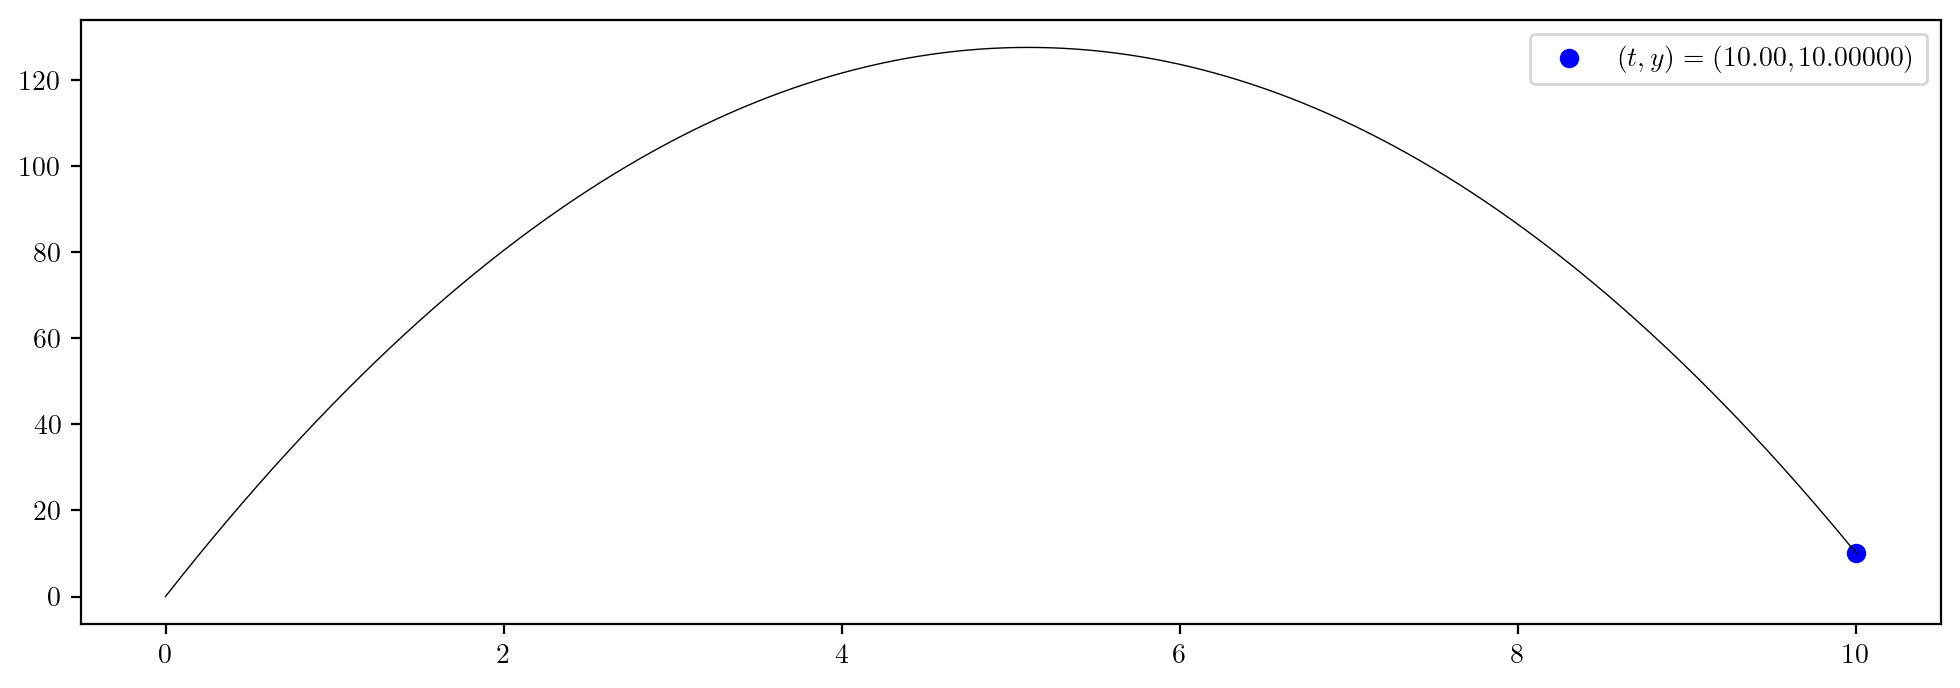

In [10]:
# Write your code here
t, y = height(50,dt=0.001,array=True)

plt.figure(dpi=200,figsize=(12,4))
plt.plot(t,y,color='black',linewidth=0.5)
plt.scatter(t[-1],y[-1],color='blue',
            label=r"$\left(t,y\right)=\left(%.2f,%.5f\right)$"%(t[-1],y[-1]))
plt.legend()
plt.show()